# Automatische Zeichenerkennung mittels eines Backpropagation-Netzes (SS2016)

### Cordula Eichhorn, Hannes Schröder, Meik Jejkal

## Aufgabenstellung

Aus vorgegebenen Datensätzen menschlicher Handschriftenproben sollen mittels eines neuronalen Backpropargation Netzes die jeweiligen Großbuchstaben des 26 stelligen deutschen Alphabets erkannt werden. Zur Realisierung des Projekts wurde das scikit-learn framework vorgegeben. Die Ergebnisse in Form von Erkennungs-, Falsch- zuweisungs- und Rückweisungsraten sollen bei verschiedener Parametrisierung grafisch aufgetragen und erläutert werden. Dabei spielen folgende Punkte eine übergeordnete Rolle:

• Modifikation der Parameter: Lernrate, Momentum und Anfangsbelegung der Gewichte  
• Unterstützung für reine Feedforward-Netze (Vermaschungen, Schleifen oder weiterführenden Topologien bleiben außen vor)  
• Konstruktionen mehrlagiger Netze mit mindestens 1 und 2 versteckten Schichten
(hidden Layers) mit jeweils wählbarer Neuronenanzahlen  
• Unterstützung für musterweises und epochenweises Lernen  
• Identischer innerer Aufbau der Neuronen etwa mit sigmoider Aktivierungsfunktion 
(ohne Betrachtung verschiedener Aktivierungsfunktionen für unterschiedliche Neuronen)
• Lernen von Einzelmustern bzw. Lernen in Epochen  

Um das neuronale Netz anzulernen können Windows interne Schriftarten verwendet werden. 

## Trainingsdaten

Die Trainingsdaten sind sog. pattern files (.pat) und bestehen aus einer Binärbildmatrix der Größe 14x14. Diese ist allerdings nicht direkt binär codiert. Sie enthält stattdessen -0.5 als Repräsentant für 0 und 0.5 entsprechend für 1. Mit Hilfe dieser Darstellung lassen sich sowohl handgeschriebene als auch maschinell generierte Schriftarten abbilden. Die Schriftproben wurden zuvor in vorherigen Semestern gesammelt, eingescannt und in digitaler Form bereitgestellt. Einige der Windows internen Schriftarten wurden ebenfalls in diese Form gebracht. Im Folgenden ist ein Beispiel aus einer Handschriftenprobe zu sehen:

In [27]:
# Ursprungsform der Daten:

M = [

[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50],
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50],
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50,  0.50, -0.50, -0.50], 
[-0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50, -0.50,  0.50,  0.50, -0.50, -0.50], 
    ]

# gewünschte Form

Z = [
       
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], 
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], 
[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], 
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], 
    ]

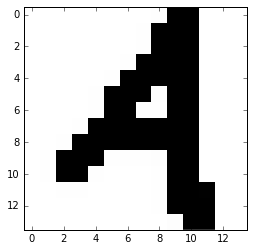

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


plt.imshow(Z, interpolation='none', cmap=plt.cm.binary)

Trainingsdaten und Testdaten aus den .pat-Dateien lesen und in ein Binärformat umwandeln. Hierzu werden die Hilfsfunktionen createXArrayOneDim, createXArrayTwoDim und createYArray verwendet.

In [29]:
#createXArrayOneDim wird benötigt um die Daten in das richtige Datenformat 
#für die fit()-Funktion vom MLPClassifier umzuwandeln.
def createXArrayOneDim(char_pos, data):
    pos = 4 + char_pos*(input_rows+1)
    x_list = []
    for i in range(pos,input_rows + pos):
        x_list.extend(np.array([float(x) for x in data[i].split()]))
    x_array = np.asarray(x_list)
    x_array[x_array == 0.5] = 1
    x_array[x_array == -0.5] = 0
    return x_array

#Ein zweidimensionales Array wird zur graphisches Darstellung (z.B. mit plt.imshow()) benötigt.
def createXArrayTwoDim(char_pos, data):
    pos = 4 + char_pos*(input_rows+1)
    x_list = []
    for i in range(pos,input_rows + pos):
        x_list.append(np.array([float(x) for x in data[i].split()]))
    x_array = np.asarray(x_list)
    x_array[x_array == 0.5] = 1
    x_array[x_array == -0.5] = 0
    return x_array
    
def createYArray(char_pos, data):
    pos = 4 + input_rows + char_pos*(input_rows+1)
    y_list=[]
    y_list.extend(np.array([float(x) for x in data[pos].split()]))
    y_array = np.asarray(y_list)
    y_array[y_array == 0.2] = 0
    y_array[y_array == 0.8] = 1
    return y_array

def score(x, expected):
    correct_predicted = 0
    for i in range(0, len(x)):
        predicted = mlp.predict(x[i].reshape(1, -1))[0]
        if (np.array_equal(predicted,expected[i])):
            correct_predicted += 1
    return correct_predicted / len(x) * 100

fname = "Trainingsdaten.pat"
with open(fname) as f:
    trainingsdaten = f.readlines()

labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
input_rows = int(trainingsdaten[0])
input_columns = int(trainingsdaten[1])
output_rows = int(trainingsdaten[2])
output_columns = int(trainingsdaten[3])

[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.
  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.
  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.
  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.]


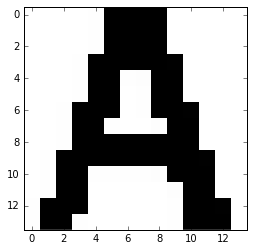

In [30]:
#Charnummerierung beginnt bei 0: 0=A, 1=B, 2=C, 3=D, ...
char = 0;
x_array = createXArrayOneDim(char, trainingsdaten)
y_array = createYArray(char, trainingsdaten)
print(x_array)
plt.imshow(createXArrayTwoDim(char, trainingsdaten), interpolation='none', cmap=plt.cm.binary)

Nachdem die Trainingsdaten eingelesen wurden, werden jetzt auch die Testdaten (Windows-Schriften und Handschriften) eingelesen und in das richtige Datenformat umgewandelt. Alle Testdaten sind danach in x_test bzw y_test vorhanden.

In [31]:
x_train = []
y_train = []
for i in range(0, 260):
    x_train.append(createXArrayOneDim(i, trainingsdaten));
    y_train.append(createYArray(i, trainingsdaten));

x_testH = []
y_testH = []
x_testW = []
y_testW = []
x_testAll = []
y_testAll = []

with open("TestHandschriften.pat") as f:
    testHandschriften = f.readlines()
    
with open("TestWindowsSchrift.pat") as f:
    testWindowsSchrift = f.readlines()
    
for i in range(0,1040):
    x_testH.append(createXArrayOneDim(i, testHandschriften))
    y_testH.append(createYArray(i, testHandschriften))
    
for i in range(0,104):
    x_testW.append(createXArrayOneDim(i, testWindowsSchrift))
    y_testW.append(createYArray(i, testWindowsSchrift))

x_testAll.extend(x_testH)
x_testAll.extend(x_testW)
y_testAll.extend(y_testH)
y_testAll.extend(y_testW)

In [32]:
def determinePredictedCharacters(predictedArray):
    chars = []
    for i in range(0,25):
        if (predictedArray[i] == 1):
            chars.append(labels[i])
    return ', '.join(chars)

## Erstes Experiment

+ Netztopologie mit nur einer versteckten Schicht
+ Musterweises Lernen  
+ einfache Initialisierung der Gewichte mit Zufallswerten zwischen -1 und 1  

In [33]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(100), max_iter=100, alpha=1e-4,
                    algorithm='l-bfgs', learning_rate='adaptive', verbose=False, tol=1e-8, 
                    learning_rate_init=.001)

mlp.fit(x_train, y_train)

MLPClassifier(activation='tanh', algorithm='l-bfgs', alpha=0.0001,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=100, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, tol=1e-08, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [34]:
print("Training set loss: %f" % mlp.loss_)
print("Training set score: %f" % score(x_train, y_train))

Training set loss: 0.000296
Training set score: 100.000000


Anschließend werden die bisher noch unbekannten Buchstaben (Windowsschriften) getestet und der MLPClassifier soll versuchen diese Buchstaben zu erkennen. 

Die Grafik wird wie folgt interpretiert: Der Buchstabe vor dem Doppelpunkt zeigt an welcher Buchstabe vorliegt. In den geschweiften Klammern steht, welche Buchstaben der MLPClassifiert erkannt hat. Unter diesen Infos wird der Buchstabe grafisch dargestellt.

Bei dieser Stichprobe wurden fast alle Buchstaben erkannt. Lediglich das Z konnte nicht zugeordnet werden.

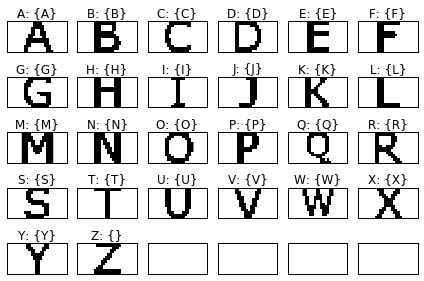

Test set score: 73.076923


In [35]:
fig, ax = plt.subplots(nrows=5, ncols=6, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(0,26):
    predictedArray = mlp.predict(x_testW[i].reshape(1, -1))[0]
    img = x_testW[i].reshape(14,14)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%s: {%s}' % (labels[i], determinePredictedCharacters(predictedArray)))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

print("Test set score: %f" % score(x_testW, y_testW))

An der Testpunktzahl von ca 70% ist aber schon ersichtlich, dass es auch Schriftarten gibt, die schlechter erkannt werden, als diese Stichprobe. Zu den eher schlecht erkannten Schriftarten gehört die folgende:

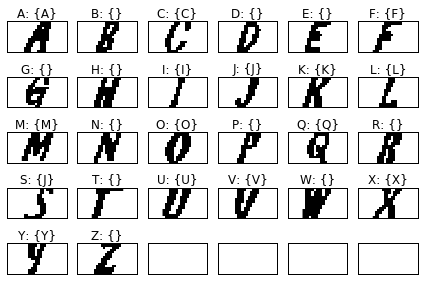

In [36]:
fig, ax = plt.subplots(nrows=5, ncols=6, sharex=True, sharey=True)
ax = ax.flatten()

font = 3
for i in range(0,26):
    predictedArray = mlp.predict(x_testW[i + font*26].reshape(1, -1))[0]
    img = x_testW[i + font*26].reshape(14,14)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%s: {%s}' % (labels[i], determinePredictedCharacters(predictedArray)))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Mit den selben Einstellungen und den selben Trainigsdaten versucht der MLPClassifier die handgeschriebenen Buchstaben zu erkennen:

Hier sieht das ganze schon deutlich schlechter aus. Lediglich die Hälfte der Buchstaben werden erkannt.

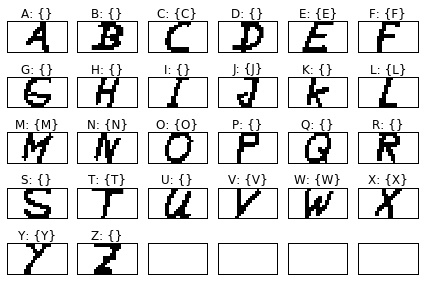

Test set score: 52.307692


In [37]:
fig, ax = plt.subplots(nrows=5, ncols=6, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(0,26):
    predictedArray = mlp.predict(x_testH[i].reshape(1, -1))[0]
    img = x_testH[i].reshape(14,14)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%s: {%s}' % (labels[i], determinePredictedCharacters(predictedArray)))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()
print("Test set score: %f" % score(x_testH, y_testH))

Die nächste Statistik verdeutlicht, wie gut die einzelnen Buchstaben in allen Schriftarten erkannt werden.

Es ist gut zu erkennen, das die niedrigste Erkennungsrate eines einzelnen Buchstaben bei 50% liegt.

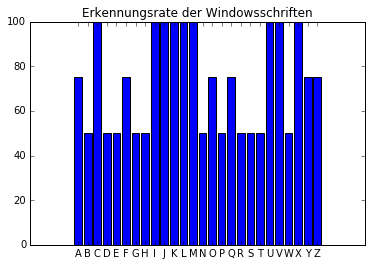

In [47]:
def recognition_rate_per_char(x, y):
    recognition_rate = []
    for char in range(0, 26):
        x_char = []
        y_char = []
        for i in range(0, int(len(x)/26)):
            x_char.append(x[char + 26*i])
            y_char.append(y[char + 26*i])
        #print_char_list(x_char)
        char_recog_rate = score(x_char, y_char)
        recognition_rate.append(char_recog_rate)
    #print(recognition_rate)
    return recognition_rate

recognition_rateW = recognition_rate_per_char(x_testW, y_testW)
plt.bar(range(0, 26), recognition_rateW, align='center')
plt.xticks(range(0, 26), labels)
plt.title('Erkennungsrate der Windowsschriften')
plt.show()

Bei den Handgeschriebenen Schriften ist die Erkennungsrate deutlich gestreuter. Die Buchstaben 'B' und 'Q' werden zu weniger als 20% erkannt. Lediglich 'C' wird immer richtig erkannt.

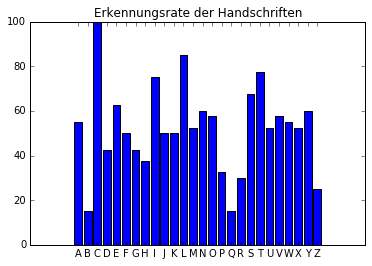

In [46]:
recognition_rateH = recognition_rate_per_char(x_testH, y_testH)
plt.bar(range(0, 26), recognition_rateH, align='center')
plt.xticks(range(0, 26), labels)
plt.title('Erkennungsrate der Handschriften')
plt.show()